<a href="https://colab.research.google.com/github/aounallahsara/ML_models/blob/main/TP5_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.decomposition import FactorAnalysis
from sklearn.cluster import KMeans

# implementation de PCA from scratch

In [ ]:
matrix = np.array([[8,2,5],
                    [1,0,1],
                    [3,-3,0]])
print(matrix)

[[ 8  2  5]
 [ 1  0  1]
 [ 3 -3  0]]


1.centré la matrice

In [ ]:
centred_matrix = np.zeros(matrix.shape)
for i in range(len(matrix)):
    centred_matrix[i] = matrix[i] - np.mean(matrix[i])
print(centred_matrix)

[[ 3.         -3.          0.        ]
 [ 0.33333333 -0.66666667  0.33333333]
 [ 3.         -3.          0.        ]]


2.covariance de matrice

In [ ]:
cov_matrix = np.cov(centred_matrix)
print(cov_matrix)

[[9.         1.5        9.        ]
 [1.5        0.33333333 1.5       ]
 [9.         1.5        9.        ]]


3.Calculer les valeurs propres et les vecteurs propres

In [ ]:
valeurs_propres, vecteurs_propres = np.linalg.eig(cov_matrix)

print(f"Valeurs propres : {np.round(valeurs_propres, 2)}")
print(f"Vecteurs propres : {np.round(vecteurs_propres, 2)}")

Valeurs propres : [18.25  0.    0.08]
Vecteurs propres : [[-0.7  -0.71  0.08]
 [-0.12 -0.   -0.99]
 [-0.7   0.71  0.08]]


In [ ]:
idx = valeurs_propres.argsort()[::-1]  # tri décroissant
valeurs_propres_sorted = valeurs_propres[idx]
vecteurs_propres_sorted = vecteurs_propres[:, idx]


In [ ]:
idx

array([0, 2, 1])

In [ ]:
print(f"Valeurs propres : {np.round(valeurs_propres, 2)}")

Valeurs propres : [18.25  0.    0.08]


In [ ]:
print(f"Vecteurs propres : {np.round(vecteurs_propres, 2)}")

Vecteurs propres : [[-0.7  -0.71  0.08]
 [-0.12 -0.   -0.99]
 [-0.7   0.71  0.08]]


5. choisir k par variance expliquée

In [ ]:
explained = valeurs_propres_sorted / valeurs_propres_sorted.sum()
cumul = np.cumsum(explained)
k = np.searchsorted(cumul, 0.90) + 1

In [ ]:
explained

array([9.95517094e-01, 4.48290637e-03, 9.86398572e-17])

In [ ]:
np.around(explained, 4)

array([0.9955, 0.0045, 0.    ])

In [ ]:
cumul

array([0.99551709, 1.        , 1.        ])

In [ ]:
k

np.int64(1)

on va choisir k manuellement : k = 2

In [ ]:
k = 2

6.Construire 𝑊 matrice de projection

In [ ]:
w = vecteurs_propres_sorted[:, :k]
w

array([[-0.70220266,  0.08313497],
       [-0.1175706 , -0.99306453],
       [-0.70220266,  0.08313497]])

7.projter les données

In [ ]:
z = (w.T).dot(centred_matrix)
z.shape

(2, 3)

In [ ]:
z

array([[-4.25240617,  4.29159636, -0.0391902 ],
       [ 0.16778828,  0.16323323, -0.33102151]])

## **LDA**

Shape X: (569, 30)
Classes: ['malignant' 'benign']
Shape après LDA: (455, 1)
Accuracy : 95.61%


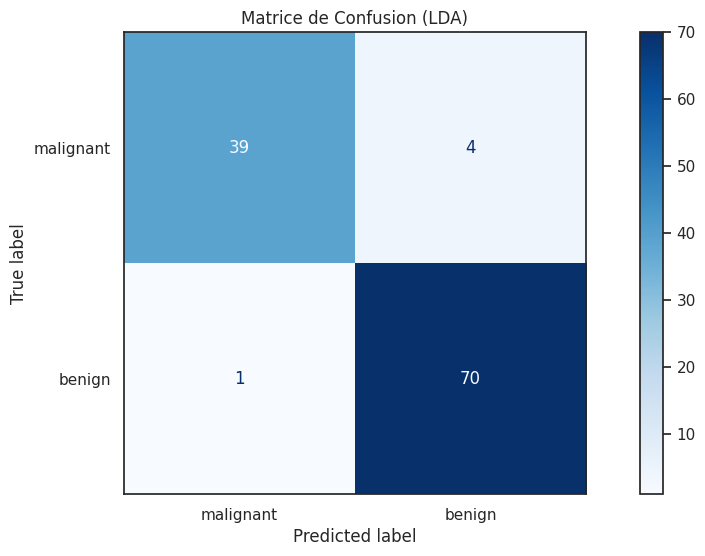

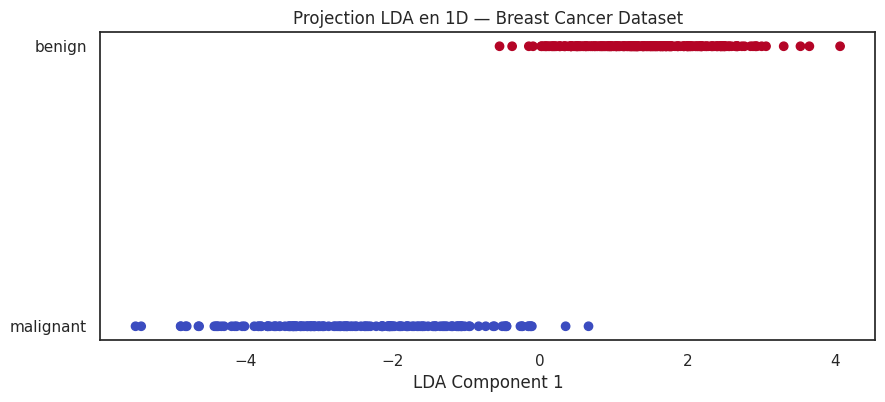

In [ ]:
data = load_breast_cancer()
X = data.data
y = data.target

print("Shape X:", X.shape)
print("Classes:", data.target_names)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


lda = LinearDiscriminantAnalysis(n_components=1)
X_train_lda = lda.fit_transform(X_train_scaled, y_train)
X_test_lda = lda.transform(X_test_scaled)

print("Shape après LDA:", X_train_lda.shape)


y_pred = lda.predict(X_test_scaled)

acc = accuracy_score(y_test, y_pred)
print(f"Accuracy : {acc*100:.2f}%")

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=data.target_names)
disp.plot(cmap="Blues")
plt.title("Matrice de Confusion (LDA)")
plt.show()



plt.figure(figsize=(10, 4))
plt.scatter(X_train_lda[:, 0], y_train, c=y_train, cmap="coolwarm")
plt.title("Projection LDA en 1D — Breast Cancer Dataset")
plt.xlabel("LDA Component 1")
plt.yticks([0, 1], data.target_names)
plt.show()


In [ ]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

kmeans = KMeans(n_clusters=2, random_state=42, n_init='auto')
kmeans.fit(X_train_pca)

y_kmeans_pred = kmeans.predict(X_test_pca)

accuracy = accuracy_score(y_test, y_kmeans_pred)

print(f"Accuracy (PCA + KMeans) : {acc_pca_Kmeans*100:.2f}%")

Accuracy (PCA + KMeans) : 92.98%


### **PCA & FA**

In [ ]:
from sklearn.datasets import fetch_openml
data = fetch_openml(name="boston", version=1, as_frame=True)
df=data.frame
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [ ]:
y=df['MEDV']
X=df.drop('MEDV',axis=1)

#standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#pca
pca = PCA(n_components=2)

X_pca = pca.fit_transform(X_scaled)

print('Components:\n', pca.components_)
print('Explained variance ratio:\n', pca.explained_variance_ratio_)

cum_explained_variance = np.cumsum(pca.explained_variance_ratio_)
print('Cumulative explained variance:\n', cum_explained_variance)

X_pca = pca.transform(X_scaled) # Apply dimensionality reduction to X.
print('Transformed data shape:', X_pca.shape)


Components:
 [[ 0.2509514  -0.25631454  0.34667207  0.00504243  0.34285231 -0.18924257
   0.3136706  -0.32154387  0.31979277  0.33846915  0.20494226 -0.20297261
   0.30975984]
 [-0.31525237 -0.3233129   0.11249291  0.45482914  0.21911553  0.14933154
   0.31197778 -0.34907    -0.27152094 -0.23945365 -0.30589695  0.23855944
  -0.07432203]]
Explained variance ratio:
 [0.47129606 0.11025193]
Cumulative explained variance:
 [0.47129606 0.581548  ]
Transformed data shape: (506, 2)


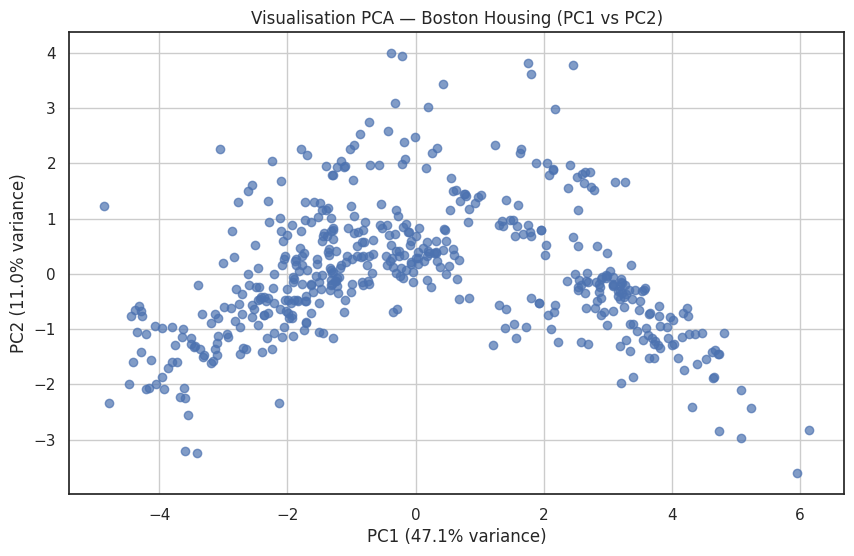

In [ ]:
#visualisation
pca_df = pd.DataFrame(data=X_pca, columns=["PC1", "PC2"])

# 6) Visualisation 2D
plt.figure(figsize=(10, 6))
plt.scatter(pca_df["PC1"], pca_df["PC2"], alpha=0.7)
plt.title("Visualisation PCA — Boston Housing (PC1 vs PC2)")
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% variance)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% variance)")
plt.grid(True)
plt.show()



In [ ]:
eigenvalues = pca.explained_variance_

kaiser_factors = np.sum(eigenvalues > 1)

print("Valeurs propres :", eigenvalues)
print("Nombre de facteurs à garder (Kaiser) :", kaiser_factors)

Valeurs propres : [6.1389812  1.43611329]
Nombre de facteurs à garder (Kaiser) : 2


In [ ]:
#facteur analysis
fa = FactorAnalysis(n_components=2, random_state=0)
X_fa = fa.fit_transform(X_scaled)
loadings = fa.components_
x_fa = pd.DataFrame(data=X_fa, columns=["Facteur 1", "Facteur 2" ])
x_fa

,Facteur 1,Facteur 2
0,-0.755804,-0.270315
1,-0.863707,-0.534311
2,-0.931084,-0.282293
3,-1.108482,0.180770
4,-1.083984,0.080527
...,...,...
501,-0.546585,-1.149296
502,-0.520736,-1.270341
503,-0.514331,-1.366338
504,-0.519341,-1.323130


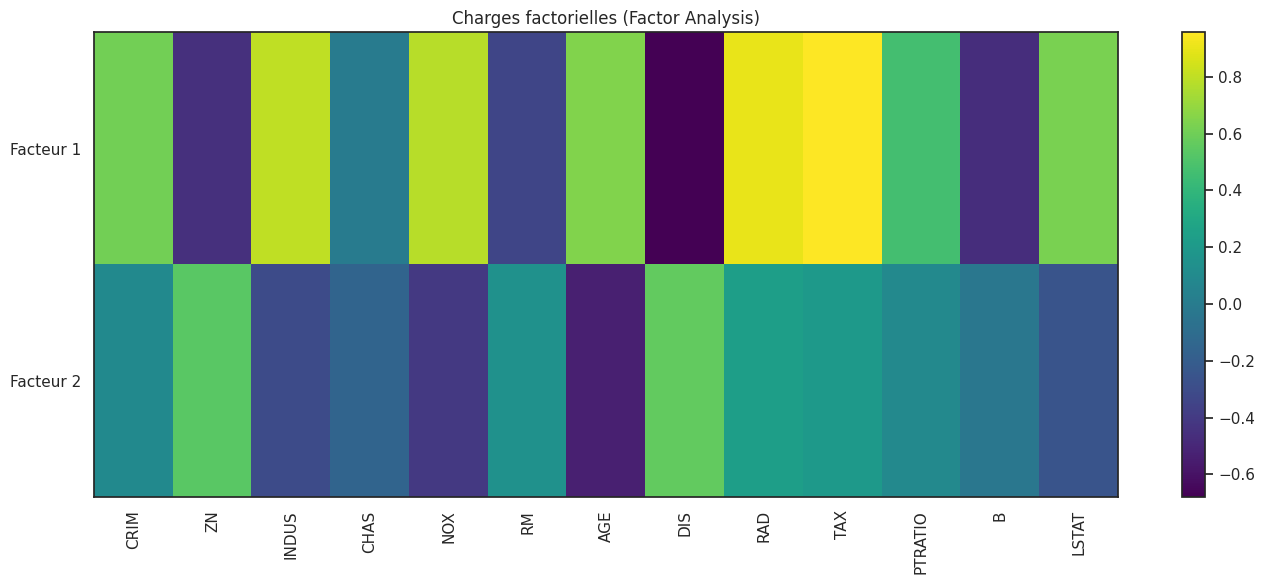

In [ ]:
feature_names = X.columns
#visualisation
plt.figure(figsize=(14, 6))
plt.imshow(loadings, cmap='viridis', aspect='auto')
plt.colorbar()
plt.xticks(ticks=np.arange(len(feature_names)), labels=feature_names, rotation=90)
plt.yticks([0, 1], ['Facteur 1', 'Facteur 2'])
plt.title("Charges factorielles (Factor Analysis)")
plt.tight_layout()
plt.show()

# TSNE ET UMAP

Shape de X : (1797, 64)
Nombre de classes : 10
Exemple d'une image (pixel values) :
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
Label correspondant : 0


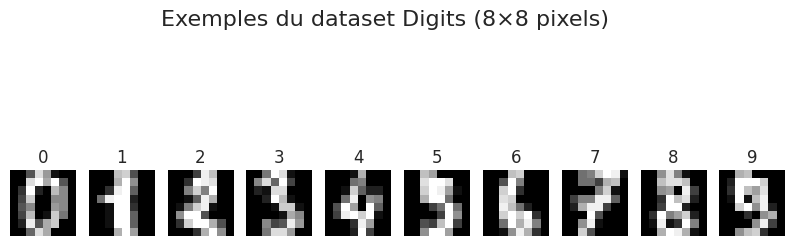

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


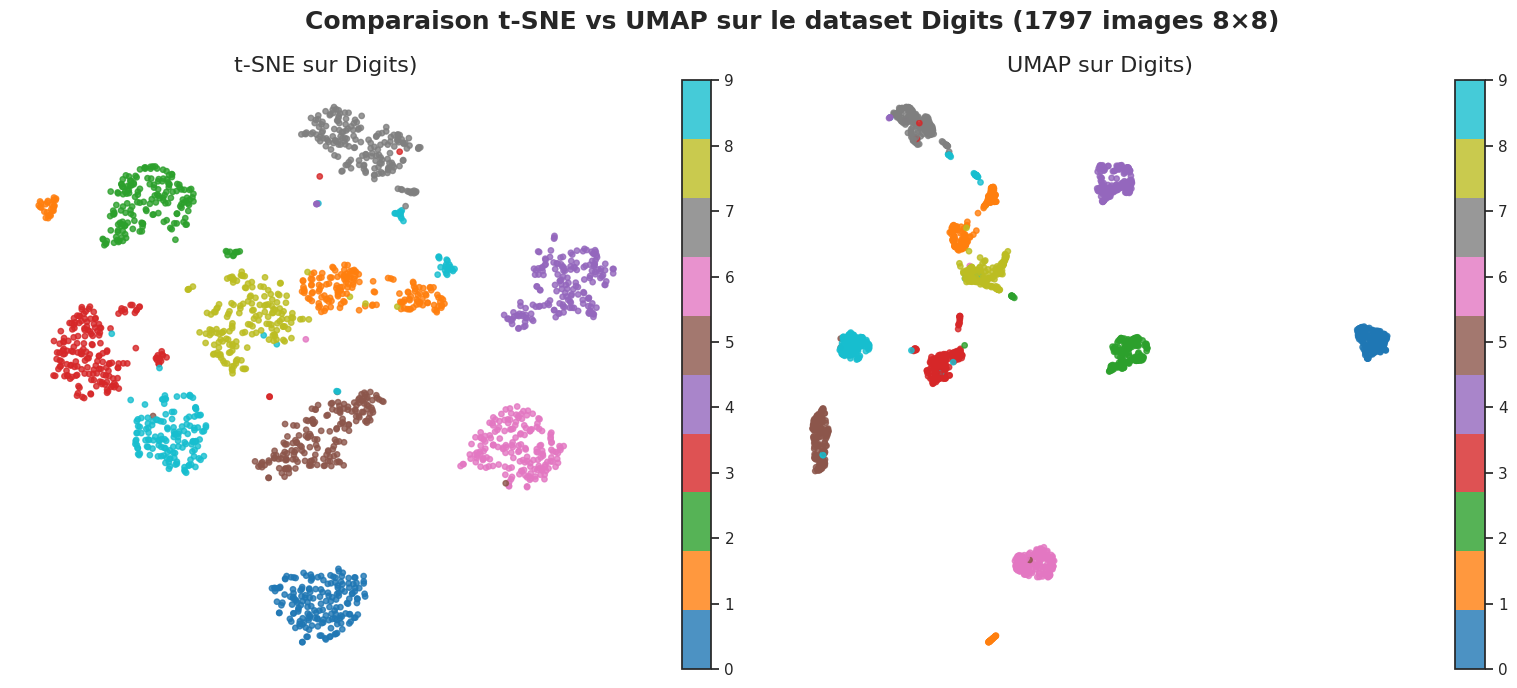

In [ ]:

!pip install umap-learn


import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.manifold import TSNE
import umap

import time
import seaborn as sns


sns.set(style="white", rc={"figure.figsize": (14, 6)})


digits = datasets.load_digits()

X = digits.data
y = digits.target

print(f"Shape de X : {X.shape}")
print(f"Nombre de classes : {len(np.unique(y))}")
print(f"Exemple d'une image (pixel values) :\n{digits.images[0]}")
print(f"Label correspondant : {y[0]}")


plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(digits.images[i], cmap="gray")
    plt.title(y[i])
    plt.axis("off")
plt.suptitle("Exemples du dataset Digits (8×8 pixels)", fontsize=16)
plt.show()


tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
X_tsne = tsne.fit_transform(X)


umap_reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, random_state=42)
X_umap = umap_reducer.fit_transform(X)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))
scatter1 = ax1.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap="tab10", s=15, alpha=0.8)
ax1.set_title(f"t-SNE sur Digits)", fontsize=16)
ax1.axis("off")
plt.colorbar(scatter1, ax=ax1, ticks=range(10))


scatter2 = ax2.scatter(X_umap[:, 0], X_umap[:, 1], c=y, cmap="tab10", s=15, alpha=0.8)
ax2.set_title(f"UMAP sur Digits)", fontsize=16)
ax2.axis("off")
plt.colorbar(scatter2, ax=ax2, ticks=range(10))

plt.suptitle("Comparaison t-SNE vs UMAP sur le dataset Digits (1797 images 8×8)",
             fontsize=18, fontweight="bold")
plt.tight_layout()
plt.show()